# Exercicios a partir do

In [1]:
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
G = nx.Graph()

In [3]:
G.add_node('A')

In [4]:
G.add_nodes_from(['B','C','D','E','F','G','H'])

In [5]:
G.nodes()

NodeView(('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'))

In [6]:
G.add_edge('A','C')

In [7]:
G.add_edges_from([('A','D'),('A','F')])

In [8]:
G.edges()

EdgeView([('A', 'C'), ('A', 'D'), ('A', 'F')])

In [9]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 8
Number of edges: 3
Average degree:   0.7500


In [10]:
G.add_edges_from([('B','C'),('C','D'),('D','E'),('D','F'),('E','F'),('E','G'),('E','H'),('G','H')])

In [11]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 8
Number of edges: 11
Average degree:   2.7500


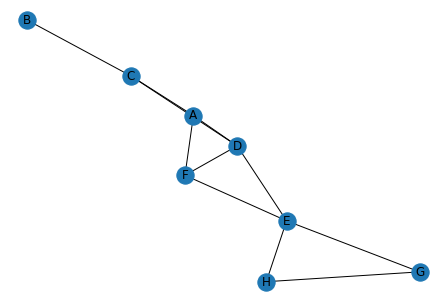

In [12]:
nx.draw(G, with_labels=True)

### A seguir, alguns indicadores que podem ser obtidos a partir da chamada de métodos simples, já disponibilizados pela biblioteca NetworkX:
+ Componentes Conexas;
+ Caminho Mínimo;
+ Vizinhos e Graus dos Vértices;
+ Betweenness centrality
+ Closeness centrality
+ Eigenvector centrality


### Componentes conexas:

In [13]:
comp_conexa = nx.connected_components(G)

In [14]:
print(list(comp_conexa))

[{'E', 'G', 'A', 'C', 'H', 'F', 'D', 'B'}]


In [15]:
# coeficiente de clusterização:
# percentual de vértices do grafo que estão conectados ao vértice em questão.
nx.clustering(G)

{'A': 0.6666666666666666,
 'B': 0,
 'C': 0.3333333333333333,
 'D': 0.5,
 'E': 0.3333333333333333,
 'F': 0.6666666666666666,
 'G': 1.0,
 'H': 1.0}

### Caminho Minimo:

In [19]:
shortest_path = nx.shortest_path(G, 'A', 'G')

In [20]:
print(shortest_path)

['A', 'D', 'E', 'G']


### Vizinhos e Graus dos Vértices:

In [39]:
grau_A = G.degree('A')

In [52]:
grau_A

3

In [67]:
sorted(nx.degree(G))

[('A', 3),
 ('B', 1),
 ('C', 3),
 ('D', 4),
 ('E', 4),
 ('F', 3),
 ('G', 2),
 ('H', 2)]

In [68]:
vizinhos_A = G.neighbors('A')

In [69]:
print(list(vizinhos_A))

['C', 'D', 'F']


### Betweenness centrality

In [21]:
bet_cen = nx.betweenness_centrality(G)

In [34]:
# Um vértice que ocorre em muitos caminhos mais
# curtos entre outros dois vértices tem maior betweenness
bet_cen

{'A': 0.047619047619047616,
 'B': 0.0,
 'C': 0.2857142857142857,
 'D': 0.40476190476190477,
 'E': 0.47619047619047616,
 'F': 0.07142857142857142,
 'G': 0.0,
 'H': 0.0}

### Closeness centrality

In [30]:
# Proximidade
clo_cen = nx.closeness_centrality(G)

In [35]:
# mede a distância menor distância média entre um vértice os outros vértices do grafo
clo_cen

{'A': 0.5384615384615384,
 'B': 0.3684210526315789,
 'C': 0.5384615384615384,
 'D': 0.7,
 'E': 0.6363636363636364,
 'F': 0.5833333333333334,
 'G': 0.4375,
 'H': 0.4375}

### Eigenvector centrality

In [32]:
# autovetor: 
eig_cen = nx.eigenvector_centrality(G)

In [36]:
# mede a importância de um vértice na rede considerando cada aresta como um voto
eig_cen

{'A': 0.4064482937186685,
 'B': 0.10468786952603328,
 'C': 0.3271389257989878,
 'D': 0.5111379513849523,
 'E': 0.4318318875455095,
 'F': 0.43182955118008715,
 'G': 0.20322747355469514,
 'H': 0.20322747355469514}

In [ ]:
# ---------------------------------------------------- #
#
#     EXEMPLO: https://medium.com/python-in-plain-english/introduction-to-network-science-with-networkx-part-3-18fd6eeaa72d
#
# ---------------------------------------------------- #

In [4]:
import networkx as nx
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

G_fb = nx.read_edgelist("./data/facebook_combined.txt.gz", create_using = nx.Graph(), nodetype=int)

(-0.613111874461174,
 1.076814851164818,
 -0.8895843505859375,
 0.8921052694320679)

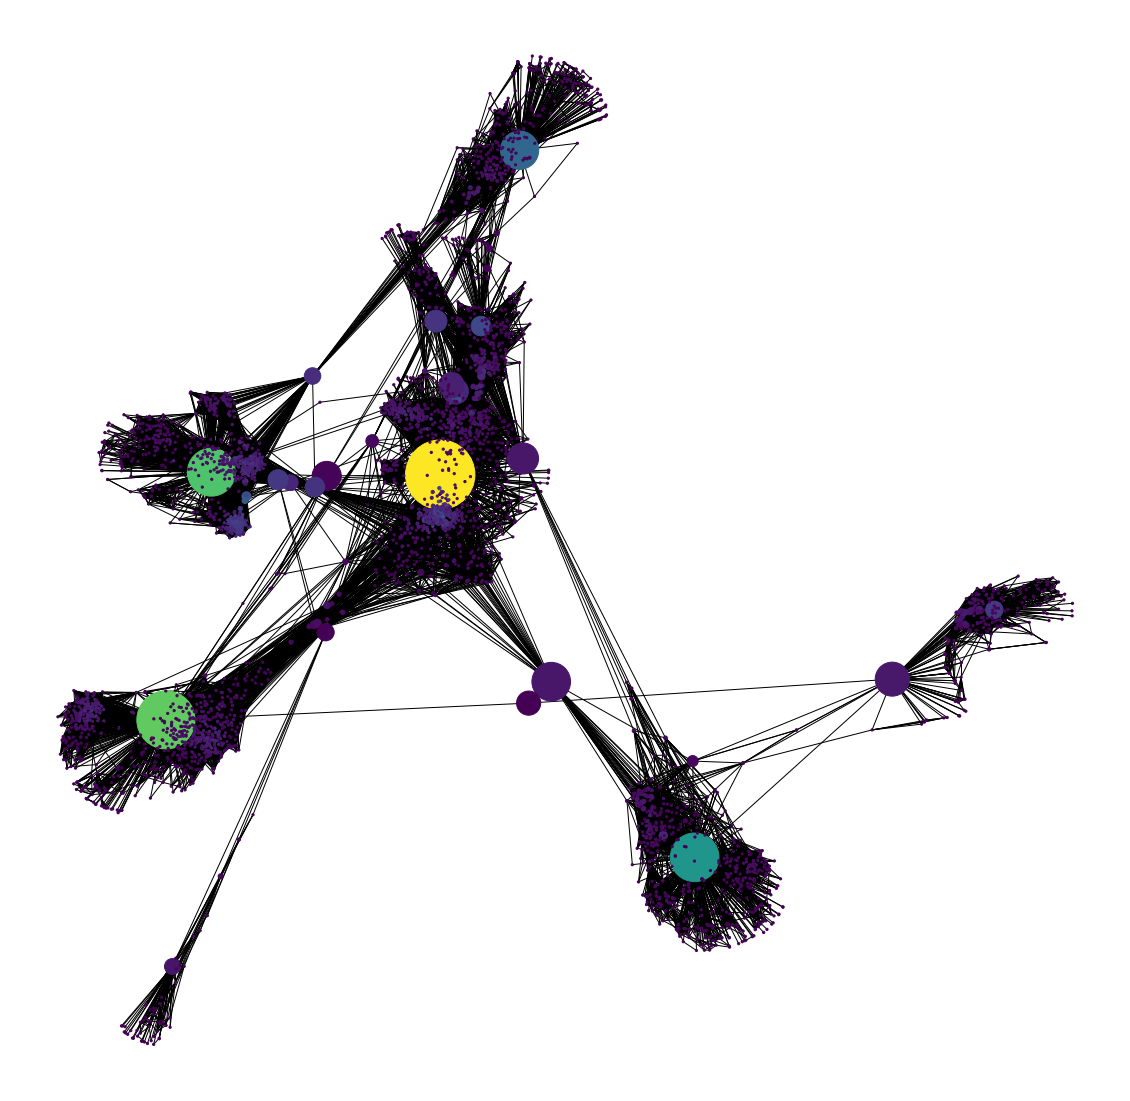

In [5]:
# essa celula -- trecho de código -- pode demorar até uns 15min para rodar

pos = nx.spring_layout(G_fb) #setting layout
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')